In [5]:
# importing required libraries
import pickle
import numpy as np
import svm_encrypted_model
import matplotlib.pyplot as plt
import naive_bayes_encrypted_model
import logistic_regression_encrypted_model
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Loading models

In [6]:
# Load the logistic_regression_model from the file
with open('logistic_regression_model.pkl', 'rb') as file:
    logistic_regression_loaded_model = pickle.load(file)

# Load the naive_bayes_model from the file
with open('naive_bayes_model.pkl', 'rb') as file:
    naive_bayes_loaded_model = pickle.load(file)

# Load the svm_model from the file
with open('svm_model.pkl', 'rb') as file:
    svm_loaded_model = pickle.load(file)

lr_X_train, lr_y_train, lr_X_test, lr_y_test = logistic_regression_encrypted_model.preprocess_data()
nb_X_train, nb_y_train, nb_X_test, nb_y_test = naive_bayes_encrypted_model.preprocess_data()
svm_X_train, svm_y_train, svm_X_test, svm_y_test = svm_encrypted_model.preprocess_data()

ModuleNotFoundError: No module named 'scipy.sparse._csr'

# Testing model on the train and test dataset 

In [ ]:
# logistic regression
lr_train_predict = logistic_regression_loaded_model.predict(lr_X_train)
lr_result_train = accuracy_score(lr_train_predict,lr_y_train)

lr_test_predict = logistic_regression_loaded_model.predict(lr_X_test)
lr_accuracy = accuracy_score(lr_test_predict, lr_y_test)

print("logistic regression train accuracy:  ",lr_result_train * 100,"%")
print("logistic regression test accuracy:  ",lr_accuracy * 100,"%"+"\n")


# naive bayes
nb_train_predict = logistic_regression_loaded_model.predict(nb_X_train)
nb_result_train = accuracy_score(nb_train_predict,nb_y_train)

nb_test_predict = logistic_regression_loaded_model.predict(nb_X_test)
nb_accuracy = accuracy_score(nb_test_predict, nb_y_test)

print("naive bayes train accuracy:  ",nb_result_train * 100,"%")
print("naive bayes test accuracy:  ",nb_accuracy * 100,"%"+"\n")


# svm
svm_train_predict = logistic_regression_loaded_model.predict(svm_X_train)
svm_result_train = accuracy_score(svm_train_predict,svm_y_train)

svm_test_predict = logistic_regression_loaded_model.predict(svm_X_test)
svm_accuracy = accuracy_score(svm_test_predict, svm_y_test)

print("svm train accuracy:  ",svm_result_train * 100,"%")
print("svm test accuracy:  ",svm_accuracy * 100,"%")

NameError: name 'lr_X_train' is not defined

# Building confusion matrix

In [ ]:
print("confusion matrix result of logistic regression: ","\n",confusion_matrix(lr_y_test,lr_test_predict),"\n")
print("confusion matrix result of naive bayes: ","\n",confusion_matrix(nb_y_test,nb_test_predict),"\n")
print("confusion matrix result of svm: ","\n",confusion_matrix(svm_y_test,svm_test_predict))

confusion matrix result of logistic regression:  
 [[7480  190]
 [ 209 2650]] 

confusion matrix result of naive bayes:  
 [[7494  192]
 [ 205 2638]] 

confusion matrix result of svm:  
 [[7465  195]
 [ 208 2661]]


# ROC curves

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(lr_y_test, lr_y_test)
fpr_nb, tpr_nb, _ = roc_curve(nb_y_test, nb_y_test)
fpr_svm, tpr_svm, _ = roc_curve(svm_y_test, svm_test_predict)

# Calculate AUC scores
auc_lr = roc_auc_score(lr_y_test, lr_y_test)
auc_nb = roc_auc_score(nb_y_test, nb_y_test)
auc_svm = roc_auc_score(svm_y_test, svm_test_predict)

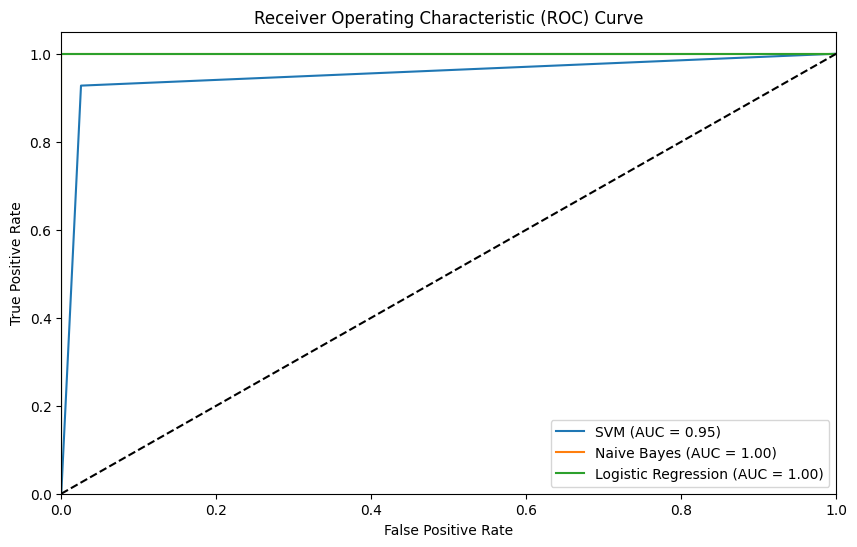

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculating metrics

In [ ]:
# Calculate Accuracy
accuracy_svm = accuracy_score(svm_test_predict, svm_y_test)
accuracy_nb = accuracy_score(nb_test_predict, nb_y_test)
accuracy_lr = accuracy_score(lr_test_predict, lr_y_test)

# Calculate Precision
precision_svm = precision_score(svm_test_predict, svm_y_test)
precision_nb = precision_score(nb_test_predict, nb_y_test)
precision_lr = precision_score(lr_test_predict, lr_y_test)

# Calculate Recall
recall_svm = recall_score(svm_test_predict, svm_y_test)
recall_nb = recall_score(nb_test_predict, nb_y_test)
recall_lr = recall_score(lr_test_predict, lr_y_test)

# Calculate F1-Score
f1_svm = f1_score(svm_test_predict, svm_y_test)
f1_nb = f1_score(nb_test_predict, nb_y_test)
f1_lr = f1_score(lr_test_predict, lr_y_test)

# Print or display the results
print("SVM Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print()

print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print()

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

SVM Metrics:
Accuracy: 0.9617
Precision: 0.9275
Recall: 0.9317
F1-Score: 0.9296

Naive Bayes Metrics:
Accuracy: 0.9623
Precision: 0.9279
Recall: 0.9322
F1-Score: 0.9300

Logistic Regression Metrics:
Accuracy: 0.9621
Precision: 0.9269
Recall: 0.9331
F1-Score: 0.9300


# classification report

In [ ]:

# Classification Report for SVM
svm_classification_report = classification_report(svm_test_predict, svm_y_test)

# Classification Report for Naive Bayes
nb_classification_report = classification_report(nb_test_predict, nb_y_test)

# Classification Report for Logistic Regression
lr_classification_report = classification_report(lr_test_predict, lr_y_test)

# Print the Classification Reports
print("Classification Report for SVM:\n", svm_classification_report)
print("\nClassification Report for Naive Bayes:\n", nb_classification_report)
print("\nClassification Report for Logistic Regression:\n", lr_classification_report)


Classification Report for SVM:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97      7676
           1       0.93      0.93      0.93      2853

    accuracy                           0.96     10529
   macro avg       0.95      0.95      0.95     10529
weighted avg       0.96      0.96      0.96     10529


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97      7676
           1       0.93      0.93      0.93      2853

    accuracy                           0.96     10529
   macro avg       0.95      0.95      0.95     10529
weighted avg       0.96      0.96      0.96     10529


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97      7674
           1       0.92      0.93      0.93      2855

    accuracy                           0.96     10529
   mac

# Plotting the metrics

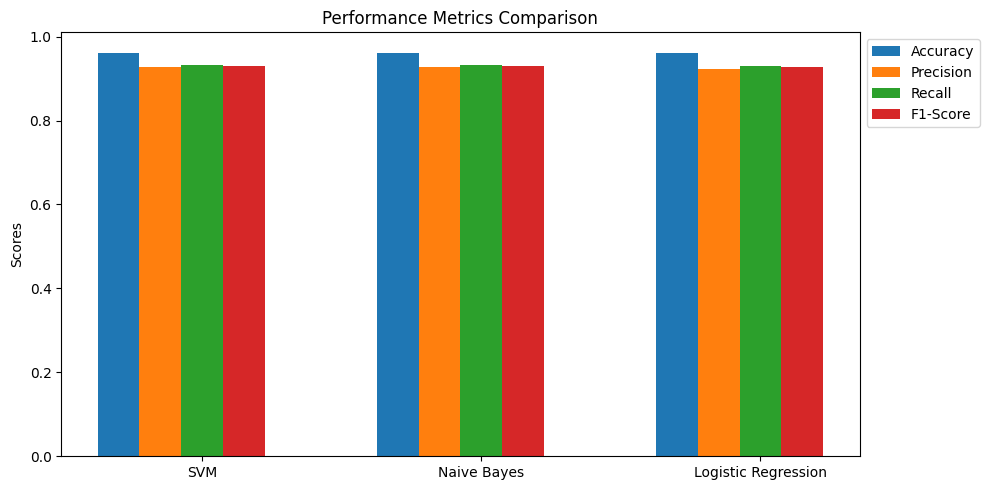

In [ ]:
# Define the models
models = ['SVM', 'Naive Bayes', 'Logistic Regression']

# Define the metric values for each model
accuracy = [accuracy_svm, accuracy_nb, accuracy_lr]
precision = [precision_svm, precision_nb, precision_lr]
recall = [recall_svm, recall_nb, recall_lr]
f1_score = [f1_svm, f1_nb, f1_lr]

# Set up positions for each group of bars
x = np.arange(len(models))
width = 0.15

# Create the grouped bar plot
fig, ax = plt.subplots(figsize=(10, 5))  # Increase the figure size
rects1 = ax.bar(x - 2 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Adjust the legend to be outside of the plot (to the right)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Display the plot
plt.tight_layout()
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()